In [5]:
import numpy as np
import pandas as pd
import itertools 
import matplotlib.pyplot as plt
import math

In [9]:
df_sura = pd.read_csv("sura.csv")
df_sura

,Date,Price,Open,High,Low,Vol.,Change %
0,03/01/2024,"29,200.0","29,480.0","29,500.0","28,960.0",24.66K,0.83%
1,02/29/2024,"28,960.0","29,600.0","29,600.0","28,960.0",61.16K,-1.83%
2,02/28/2024,"29,500.0","29,940.0","29,940.0","29,500.0",11.13K,-1.47%
3,02/27/2024,"29,940.0","29,960.0","29,960.0","29,940.0",2.46K,-1.51%
4,02/26/2024,"30,400.0","31,000.0","31,000.0","30,400.0",17.96K,-1.94%
...,...,...,...,...,...,...,...
882,04/07/2020,"22,800.0","21,980.0","23,280.0","21,980.0",294.13K,4.11%
883,04/06/2020,"21,900.0","20,500.0","21,900.0","20,500.0",257.81K,9.72%
884,04/03/2020,"19,960.0","20,000.0","20,280.0","19,020.0",182.67K,1.84%
885,04/02/2020,"19,600.0","18,500.0","19,600.0","18,500.0",222.58K,5.95%


# Preprocesamiento

In [10]:
#Eliminar columnas inútiles
df_sura = df_sura.drop(columns=['Open','High','Low','Vol.','Change %'])

#Se invierte el dataframe para empezar desde los datos mas antiguos
df_sura = df_sura.iloc[::-1]
df_sura = df_sura.reset_index(drop=True)

#Convertir los precios de string a float
df_sura['Price'] = df_sura['Price'].str.replace(',', '')
df_sura['Price'] = df_sura['Price'].astype(float)

#Añade la columna Y_n definida en la guía
new_col = [0]
for i in range(1, len(df_sura)):
    new_col.append(float((df_sura['Price'][i]/df_sura['Price'][i-1]) - 1))
df_sura.insert(2, 'Yn', new_col, True)

#Eliminamos primer dato debido a que no se puede calcular Yn
df_sura = df_sura.drop([0])
df_sura = df_sura.reset_index(drop=True)

In [11]:
# Temporalmente ajusta las opciones de visualización para el DataFrame df_bancolombia
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df_sura)

           Date    Price         Yn
0    04/02/2020  19600.0  5.946e-02
1    04/03/2020  19960.0  1.837e-02
2    04/06/2020  21900.0  9.719e-02
3    04/07/2020  22800.0  4.110e-02
4    04/08/2020  23000.0  8.772e-03
5    04/13/2020  24140.0  4.957e-02
6    04/14/2020  24500.0  1.491e-02
7    04/15/2020  24720.0  8.980e-03
8    04/16/2020  24700.0 -8.091e-04
9    04/17/2020  24120.0 -2.348e-02
10   04/20/2020  23300.0 -3.400e-02
11   04/21/2020  21600.0 -7.296e-02
12   04/22/2020  21460.0 -6.481e-03
13   04/23/2020  21620.0  7.456e-03
14   04/24/2020  21360.0 -1.203e-02
15   04/27/2020  20100.0 -5.899e-02
16   04/28/2020  21120.0  5.075e-02
17   04/29/2020  22000.0  4.167e-02
18   04/30/2020  21520.0 -2.182e-02
19   05/04/2020  20500.0 -4.740e-02
20   05/05/2020  20960.0  2.244e-02
21   05/06/2020  20800.0 -7.634e-03
22   05/07/2020  21000.0  9.615e-03
23   05/08/2020  20420.0 -2.762e-02
24   05/11/2020  19620.0 -3.918e-02
25   05/12/2020  19540.0 -4.077e-03
26   05/13/2020  19040.0 -2.

# Definición de estados

In [12]:
#calcula estados basados en el valor de la columna 'Yn' en relación con la desviación estándar de una ventana de datos de tamaño l
new_col = []
l = 20
data = df_sura['Yn']

for i, percentage in enumerate(data):
    if(i >= (l - 1)):
        min = i - l + 1
        
        desviacion = np.std(data[min:i])

        if percentage >= (2 * desviacion):
            new_col.append('S3')
        elif percentage >= desviacion:
            new_col.append('S2')
        elif percentage >= 0:
            new_col.append('S1')
        elif percentage >= -(desviacion):
            new_col.append('B1')
        elif percentage >= -(2 * desviacion):
            new_col.append('B2')
        else:
            new_col.append('B3')

# Elimina las primeras filas del DataFrame df_sura que se utilizaron para calcular los primeros estados
df_sura = df_sura.drop([i for i in range(l-1)])
# Inserta la columna de estados calculados en la posición 2 del DataFrame df_sura
df_sura.insert(2, 'Estado', new_col, True)
# Reestablece los índices del DataFrame df_sura después de eliminar las filas
df_sura = df_sura.reset_index(drop=True)

In [13]:
df_sura

,Date,Price,Estado,Yn
0,05/04/2020,20500.0,B2,-0.047398
1,05/05/2020,20960.0,S1,0.022439
2,05/06/2020,20800.0,B1,-0.007634
3,05/07/2020,21000.0,S1,0.009615
4,05/08/2020,20420.0,B1,-0.027619
...,...,...,...,...
862,02/26/2024,30400.0,B1,-0.019355
863,02/27/2024,29940.0,B1,-0.015132
864,02/28/2024,29500.0,B1,-0.014696
865,02/29/2024,28960.0,B1,-0.018305


In [14]:
estados_posibles = ['B3', 'B2', 'B1', 'S1', 'S2', 'S3']  # Posibles estados del sistema

total_cols = len(estados_posibles)  # Calcula el número total de columnas, que es igual al número de estados posibles
total_rows = total_cols * total_cols  # Calcula el número total de filas como el cuadrado del número de estados posibles

In [15]:
#matriz de transición para un modelo Markoviano
estados = np.array(df_sura['Estado'])

markovian_table = np.array(estados)
estados = np.delete(estados, 0)
estados = np.append(estados, 0)
markovian_table = np.vstack([markovian_table,estados])
estados = np.delete(estados, 0)
estados = np.append(estados, 0)
markovian_table = np.vstack([markovian_table,estados])

markovian_table = markovian_table.T
markovian_table = np.delete(markovian_table, [-1, -2], axis=0)
markovian_table 

array([['B2', 'S1', 'B1'],
       ['S1', 'B1', 'S1'],
       ['B1', 'S1', 'B1'],
       ...,
       ['B1', 'B1', 'B1'],
       ['B1', 'B1', 'B1'],
       ['B1', 'B1', 'S1']], dtype=object)

In [16]:
#frecuencias esperadas de transición entre estados
expected_freq = [[0] * (total_cols + 1) for i in range(total_cols)]

for i in range(len(markovian_table)):
    actual = markovian_table[i][1]
    row_index = estados_posibles.index(actual)
    col_index = estados_posibles.index(markovian_table[i][2])

    expected_freq[row_index][col_index] += 1
    expected_freq[row_index][total_cols] += 1

cols = estados_posibles.copy()
cols.append('Recuento')
expected_freq_df = pd.DataFrame(expected_freq, columns=cols)
cols.pop(-1)
expected_freq_df.insert(0, 'T_Actual', cols)
expected_freq_df

,T_Actual,B3,B2,B1,S1,S2,S3,Recuento
0,B3,1,4,1,13,3,2,24
1,B2,3,12,29,28,15,9,96
2,B1,6,29,129,109,28,8,309
3,S1,7,33,114,107,31,13,305
4,S2,4,12,24,36,11,4,91
5,S3,3,6,12,12,3,4,40


In [17]:
#Verifica si la frecuencia esperada de transición entre estados en el modelo Markoviano es mayor o igual a 5 para la validez empírica del modelo. 
invalid_counter = 0

for i in range(total_cols):
    for j in range(1,total_cols + 1):
        if expected_freq_df.iat[i, j] < 5:
            invalid_counter += 1
            
cumple_empirica = invalid_counter < 0.25 * (total_cols ** 2)
print(f'Cumple la empírica? RTA: {cumple_empirica}') 

Cumple la empírica? RTA: False


# Modelo - Matriz de transición

In [18]:
# probabilidad de transición entre los estados del modelo Markoviano
model_freq = [[0] * total_cols for i in range(total_cols)]
total_freq = [0,0,0,0,0,0,0,0]

for i in range(len(markovian_table)):
    actual = markovian_table[i][1]
    row_index = estados_posibles.index(actual)
    col_index = estados_posibles.index(markovian_table[i][2])

    model_freq[row_index][col_index] += 1
    total_freq[row_index] += 1

model_transition_prob_df = pd.DataFrame(model_freq, columns=estados_posibles)
model_transition_prob_df.insert(0, 'Actual', estados_posibles)

for i in range(total_cols):
    for j in range(1,total_cols+1):
        model_transition_prob_df.iat[i, j] = (model_transition_prob_df.iat[i, j]/total_freq[i]).astype(float)

model_transition_prob_df

C:\Users\aleja\AppData\Local\Temp\ipykernel_18156\868081643.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.041666666666666664' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  model_transition_prob_df.iat[i, j] = (model_transition_prob_df.iat[i, j]/total_freq[i]).astype(float)
C:\Users\aleja\AppData\Local\Temp\ipykernel_18156\868081643.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.16666666666666666' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  model_transition_prob_df.iat[i, j] = (model_transition_prob_df.iat[i, j]/total_freq[i]).astype(float)
C:\Users\aleja\AppData\Local\Temp\ipykernel_18156\868081643.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5416666666666666' 

,Actual,B3,B2,B1,S1,S2,S3
0,B3,0.041667,0.166667,0.041667,0.541667,0.125000,0.083333
1,B2,0.031250,0.125000,0.302083,0.291667,0.156250,0.093750
2,B1,0.019417,0.093851,0.417476,0.352751,0.090615,0.025890
3,S1,0.022951,0.108197,0.373770,0.350820,0.101639,0.042623
4,S2,0.043956,0.131868,0.263736,0.395604,0.120879,0.043956
5,S3,0.075000,0.150000,0.300000,0.300000,0.075000,0.100000


# Propiedad Markoviana

In [19]:
# frecuencias observadas de transición entre pares de estados del modelo Markoviano
observed_rows = list(itertools.product(estados_posibles,repeat=2))

observed_freq = [[0] * (total_cols + 1) for i in range(total_rows)]

for i in range(len(markovian_table)):
    history = (markovian_table[i][0],markovian_table[i][1])
    row_index = observed_rows.index(history)
    col_index = estados_posibles.index(markovian_table[i][2])

    observed_freq[row_index][col_index] += 1
    observed_freq[row_index][total_cols] += 1

cols = estados_posibles.copy()
cols.append('Recuento')
observed_freq_df = pd.DataFrame(observed_freq, columns=cols)
observed_freq_df.insert(0, 'History', observed_rows)
observed_freq_df

,History,B3,B2,B1,S1,S2,S3,Recuento
0,"(B3, B3)",0,1,0,0,0,0,1
1,"(B3, B2)",1,0,1,2,0,0,4
2,"(B3, B1)",0,0,0,0,1,0,1
3,"(B3, S1)",0,2,5,2,3,1,13
4,"(B3, S2)",0,0,0,3,0,0,3
5,"(B3, S3)",0,1,1,0,0,0,2
6,"(B2, B3)",0,0,1,2,0,0,3
7,"(B2, B2)",0,1,5,4,0,2,12
8,"(B2, B1)",2,3,13,7,4,0,29
9,"(B2, S1)",1,2,11,8,6,1,29


In [20]:
# probabilidades observadas de transición entre pares de estados del modelo Markoviano utilizando las frecuencias observadas
observed_prob_df = observed_freq_df.copy()
for i in range(total_rows):
    for j in range(1,total_cols+1):
        if observed_prob_df.iat[i, total_cols+1] == 0:
            observed_prob_df.iat[i, j] = 0
        else:
            observed_prob_df.iat[i, j] = (observed_prob_df.iat[i, j]/observed_prob_df.iat[i, total_cols+1]).astype(float)

observed_prob_df = observed_prob_df.drop(columns=['Recuento'], axis=1)
observed_prob_df

C:\Users\aleja\AppData\Local\Temp\ipykernel_18156\4282028612.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  observed_prob_df.iat[i, j] = (observed_prob_df.iat[i, j]/observed_prob_df.iat[i, total_cols+1]).astype(float)
C:\Users\aleja\AppData\Local\Temp\ipykernel_18156\4282028612.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  observed_prob_df.iat[i, j] = (observed_prob_df.iat[i, j]/observed_prob_df.iat[i, total_cols+1]).astype(float)
C:\Users\aleja\AppData\Local\Temp\ipykernel_18156\4282028612.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.15384615384615385' has dtype incom

,History,B3,B2,B1,S1,S2,S3
0,"(B3, B3)",0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1,"(B3, B2)",0.250000,0.000000,0.250000,0.500000,0.000000,0.000000
2,"(B3, B1)",0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
3,"(B3, S1)",0.000000,0.153846,0.384615,0.153846,0.230769,0.076923
4,"(B3, S2)",0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
5,"(B3, S3)",0.000000,0.500000,0.500000,0.000000,0.000000,0.000000
6,"(B2, B3)",0.000000,0.000000,0.333333,0.666667,0.000000,0.000000
7,"(B2, B2)",0.000000,0.083333,0.416667,0.333333,0.000000,0.166667
8,"(B2, B1)",0.068966,0.103448,0.448276,0.241379,0.137931,0.000000
9,"(B2, S1)",0.034483,0.068966,0.379310,0.275862,0.206897,0.034483


In [21]:
expected_freq = [[0] * (total_cols + 1) for i in range(total_cols)]

for i in range(len(markovian_table)):
    actual = markovian_table[i][1]
    row_index = estados_posibles.index(actual)
    col_index = estados_posibles.index(markovian_table[i][2])

    expected_freq[row_index][col_index] += 1
    expected_freq[row_index][total_cols] += 1

cols = estados_posibles.copy()
cols.append('Recuento')
expected_freq_df = pd.DataFrame(expected_freq, columns=cols)
cols.pop(-1)
expected_freq_df.insert(0, 'History', cols)
expected_freq_df

,History,B3,B2,B1,S1,S2,S3,Recuento
0,B3,1,4,1,13,3,2,24
1,B2,3,12,29,28,15,9,96
2,B1,6,29,129,109,28,8,309
3,S1,7,33,114,107,31,13,305
4,S2,4,12,24,36,11,4,91
5,S3,3,6,12,12,3,4,40


In [22]:
expected_prob_df = expected_freq_df.copy()
for i in range(total_cols):
    for j in range(1,total_cols+1):
        expected_prob_df.iat[i, j] = (expected_prob_df.iat[i, j]/expected_prob_df.iat[i, total_cols+1]).astype(float)

expected_prob_df = expected_prob_df.drop(columns=['Recuento'], axis=1)
expected_prob_df

C:\Users\aleja\AppData\Local\Temp\ipykernel_18156\1491194249.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.041666666666666664' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  expected_prob_df.iat[i, j] = (expected_prob_df.iat[i, j]/expected_prob_df.iat[i, total_cols+1]).astype(float)
C:\Users\aleja\AppData\Local\Temp\ipykernel_18156\1491194249.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.16666666666666666' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  expected_prob_df.iat[i, j] = (expected_prob_df.iat[i, j]/expected_prob_df.iat[i, total_cols+1]).astype(float)
C:\Users\aleja\AppData\Local\Temp\ipykernel_18156\1491194249.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.54

,History,B3,B2,B1,S1,S2,S3
0,B3,0.041667,0.166667,0.041667,0.541667,0.125000,0.083333
1,B2,0.031250,0.125000,0.302083,0.291667,0.156250,0.093750
2,B1,0.019417,0.093851,0.417476,0.352751,0.090615,0.025890
3,S1,0.022951,0.108197,0.373770,0.350820,0.101639,0.042623
4,S2,0.043956,0.131868,0.263736,0.395604,0.120879,0.043956
5,S3,0.075000,0.150000,0.300000,0.300000,0.075000,0.100000


In [23]:
chi_values = []
k = 0

for i in range(total_rows):
    for j in range(1,total_cols+1):
        if expected_prob_df.iat[k,j] == 0:
            chi_parcial = (0)
        else: 
            chi_parcial = observed_freq_df.iat[i,total_cols+1] * ((observed_prob_df.iat[i,j] - expected_prob_df.iat[k,j]) ** 2) / expected_prob_df.iat[k,j]

        chi_values.append(chi_parcial)

    k += 1
    if k == total_cols:
        k = 0

chi_observado = sum(chi_values)
chi_observado

178.3991122543549

In [24]:
from scipy.stats.distributions import chi2

alpha = 0.01
rows = total_rows
cols = total_cols
grados = (rows - 1)*(cols - 1)

chi_teorico = chi2.ppf(1 - alpha, df=grados)
chi_teorico

221.4383745662851

In [25]:
is_not_markovian = chi_observado >= chi_teorico
print(f'Se rechaza la cadena (no es markoviana)? RTA: {is_not_markovian}')

Se rechaza la cadena (no es markoviana)? RTA: False


# Propiedad Estacionaria

Definiremos los periodos de tiempo como años

In [26]:
new_col = []
for date in df_sura['Date']:
    if '2020' in date:
        new_col.append(1)
    elif '2021' in date:
        new_col.append(2)
    elif '2022' in date:
        new_col.append(3)
    elif '2023' in date:
        new_col.append(4)
    else:
        new_col.append(5)
df_sura.insert(2, 'Periodo', new_col, True)

df_sura

,Date,Price,Periodo,Estado,Yn
0,05/04/2020,20500.0,1,B2,-0.047398
1,05/05/2020,20960.0,1,S1,0.022439
2,05/06/2020,20800.0,1,B1,-0.007634
3,05/07/2020,21000.0,1,S1,0.009615
4,05/08/2020,20420.0,1,B1,-0.027619
...,...,...,...,...,...
862,02/26/2024,30400.0,5,B1,-0.019355
863,02/27/2024,29940.0,5,B1,-0.015132
864,02/28/2024,29500.0,5,B1,-0.014696
865,02/29/2024,28960.0,5,B1,-0.018305


In [27]:
periodos = np.array(df_sura['Periodo'])
estados = np.array(df_sura['Estado'])

stationary_table = np.array(periodos)
stationary_table = np.vstack([stationary_table, estados])
estados = np.delete(estados, 0)
estados = np.append(estados, 0)
stationary_table = np.vstack([stationary_table, estados])

stationary_table = stationary_table.T
stationary_table = np.delete(stationary_table, -1, axis=0)
stationary_table 

array([[1, 'B2', 'S1'],
       [1, 'S1', 'B1'],
       [1, 'B1', 'S1'],
       ...,
       [5, 'B1', 'B1'],
       [5, 'B1', 'B1'],
       [5, 'B1', 'S1']], dtype=object)

In [28]:
observed_rows = list(itertools.product([1,2,3,4,5], estados_posibles))

observed_freq = [[0] * (total_cols + 1) for i in range(len(observed_rows))]

for i in range(len(markovian_table)):
    history = (stationary_table[i][0], stationary_table[i][1])
    row_index = observed_rows.index(history)
    col_index = estados_posibles.index(stationary_table[i][2])

    observed_freq[row_index][col_index] += 1
    observed_freq[row_index][total_cols] += 1

cols = estados_posibles.copy()
cols.append('Recuento')
observed_freq_stat_df = pd.DataFrame(observed_freq, columns=cols)
observed_freq_stat_df.insert(0, 'History', observed_rows)
observed_freq_stat_df

,History,B3,B2,B1,S1,S2,S3,Recuento
0,"(1, B3)",0,1,0,1,0,0,2
1,"(1, B2)",0,0,4,6,3,2,15
2,"(1, B1)",1,7,26,19,6,2,61
3,"(1, S1)",0,4,25,18,8,2,57
4,"(1, S2)",0,3,4,9,2,1,19
5,"(1, S3)",1,0,2,4,0,0,7
6,"(2, B3)",1,1,0,1,1,1,5
7,"(2, B2)",1,6,12,7,3,1,30
8,"(2, B1)",0,9,39,31,8,1,88
9,"(2, S1)",2,8,29,27,6,2,74


In [29]:
observed_prob_stat_df = observed_freq_stat_df.copy()
for i in range(len(observed_rows)):
    for j in range(1,total_cols+1):
        if observed_prob_stat_df.iat[i, total_cols+1] == 0:
            observed_prob_stat_df.iat[i, j] = 0
        else:
            observed_prob_stat_df.iat[i, j] = (observed_prob_stat_df.iat[i, j]/observed_prob_stat_df.iat[i, total_cols+1]).astype(float)

observed_prob_stat_df = observed_prob_stat_df.drop(columns=['Recuento'], axis=1)
observed_prob_stat_df

C:\Users\aleja\AppData\Local\Temp\ipykernel_18156\1821551178.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  observed_prob_stat_df.iat[i, j] = (observed_prob_stat_df.iat[i, j]/observed_prob_stat_df.iat[i, total_cols+1]).astype(float)
C:\Users\aleja\AppData\Local\Temp\ipykernel_18156\1821551178.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.26666666666666666' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  observed_prob_stat_df.iat[i, j] = (observed_prob_stat_df.iat[i, j]/observed_prob_stat_df.iat[i, total_cols+1]).astype(float)
C:\Users\aleja\AppData\Local\Temp\ipykernel_18156\1821551178.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas

,History,B3,B2,B1,S1,S2,S3
0,"(1, B3)",0.000000,0.500000,0.000000,0.500000,0.000000,0.000000
1,"(1, B2)",0.000000,0.000000,0.266667,0.400000,0.200000,0.133333
2,"(1, B1)",0.016393,0.114754,0.426230,0.311475,0.098361,0.032787
3,"(1, S1)",0.000000,0.070175,0.438596,0.315789,0.140351,0.035088
4,"(1, S2)",0.000000,0.157895,0.210526,0.473684,0.105263,0.052632
5,"(1, S3)",0.142857,0.000000,0.285714,0.571429,0.000000,0.000000
6,"(2, B3)",0.200000,0.200000,0.000000,0.200000,0.200000,0.200000
7,"(2, B2)",0.033333,0.200000,0.400000,0.233333,0.100000,0.033333
8,"(2, B1)",0.000000,0.102273,0.443182,0.352273,0.090909,0.011364
9,"(2, S1)",0.027027,0.108108,0.391892,0.364865,0.081081,0.027027


In [30]:
expected_prob_df

,History,B3,B2,B1,S1,S2,S3
0,B3,0.041667,0.166667,0.041667,0.541667,0.125000,0.083333
1,B2,0.031250,0.125000,0.302083,0.291667,0.156250,0.093750
2,B1,0.019417,0.093851,0.417476,0.352751,0.090615,0.025890
3,S1,0.022951,0.108197,0.373770,0.350820,0.101639,0.042623
4,S2,0.043956,0.131868,0.263736,0.395604,0.120879,0.043956
5,S3,0.075000,0.150000,0.300000,0.300000,0.075000,0.100000


In [31]:
chi_values = []
k = 0

for i in range(len(observed_rows)):
    for j in range(1,total_cols+1):
        if expected_prob_df.iat[k,j] == 0:
            chi_parcial = 0
        else: 
            chi_parcial = observed_freq_stat_df.iat[i,total_cols+1] * ((observed_prob_stat_df.iat[i,j] - expected_prob_df.iat[k,j]) ** 2) / expected_prob_df.iat[k,j]

        chi_values.append(chi_parcial)

    k += 1
    if k == total_cols:
        k = 0

chi_stat_observado = sum(chi_values)
chi_stat_observado

107.83916764983617

In [32]:
is_not_stationary = chi_stat_observado >= chi_teorico
print(f'La cadena no cumple la propiedad estacionaria? RTA: {is_not_stationary}')

La cadena no cumple la propiedad estacionaria? RTA: False


# Análisis de la cadena

## Punto A.

In [33]:
secuencias_posibles = list(itertools.product(estados_posibles[3:6], repeat=3))

secuencias_posibles

[('S1', 'S1', 'S1'),
 ('S1', 'S1', 'S2'),
 ('S1', 'S1', 'S3'),
 ('S1', 'S2', 'S1'),
 ('S1', 'S2', 'S2'),
 ('S1', 'S2', 'S3'),
 ('S1', 'S3', 'S1'),
 ('S1', 'S3', 'S2'),
 ('S1', 'S3', 'S3'),
 ('S2', 'S1', 'S1'),
 ('S2', 'S1', 'S2'),
 ('S2', 'S1', 'S3'),
 ('S2', 'S2', 'S1'),
 ('S2', 'S2', 'S2'),
 ('S2', 'S2', 'S3'),
 ('S2', 'S3', 'S1'),
 ('S2', 'S3', 'S2'),
 ('S2', 'S3', 'S3'),
 ('S3', 'S1', 'S1'),
 ('S3', 'S1', 'S2'),
 ('S3', 'S1', 'S3'),
 ('S3', 'S2', 'S1'),
 ('S3', 'S2', 'S2'),
 ('S3', 'S2', 'S3'),
 ('S3', 'S3', 'S1'),
 ('S3', 'S3', 'S2'),
 ('S3', 'S3', 'S3')]

In [34]:
probabilidad_total = 0
for secuencia in secuencias_posibles:
    prob_1 = model_transition_prob_df[secuencia[1]][list(model_transition_prob_df['Actual']).index(secuencia[0])]
    prob_2 = model_transition_prob_df[secuencia[2]][list(model_transition_prob_df['Actual']).index(secuencia[1])]
    prob = prob_1 * prob_2
    probabilidad_total += prob
    
probabilidad_total

0.7734318263386352

## Punto B.

In [35]:
secuencias_posibles = list(itertools.product(estados_posibles[0:3], repeat=3))

secuencias_posibles

[('B3', 'B3', 'B3'),
 ('B3', 'B3', 'B2'),
 ('B3', 'B3', 'B1'),
 ('B3', 'B2', 'B3'),
 ('B3', 'B2', 'B2'),
 ('B3', 'B2', 'B1'),
 ('B3', 'B1', 'B3'),
 ('B3', 'B1', 'B2'),
 ('B3', 'B1', 'B1'),
 ('B2', 'B3', 'B3'),
 ('B2', 'B3', 'B2'),
 ('B2', 'B3', 'B1'),
 ('B2', 'B2', 'B3'),
 ('B2', 'B2', 'B2'),
 ('B2', 'B2', 'B1'),
 ('B2', 'B1', 'B3'),
 ('B2', 'B1', 'B2'),
 ('B2', 'B1', 'B1'),
 ('B1', 'B3', 'B3'),
 ('B1', 'B3', 'B2'),
 ('B1', 'B3', 'B1'),
 ('B1', 'B2', 'B3'),
 ('B1', 'B2', 'B2'),
 ('B1', 'B2', 'B1'),
 ('B1', 'B1', 'B3'),
 ('B1', 'B1', 'B2'),
 ('B1', 'B1', 'B1')]

In [36]:
probabilidad_total = 0
for secuencia in secuencias_posibles:
    prob_1 = model_transition_prob_df[secuencia[1]][list(model_transition_prob_df['Actual']).index(secuencia[0])]
    prob_2 = model_transition_prob_df[secuencia[2]][list(model_transition_prob_df['Actual']).index(secuencia[1])]
    prob = prob_1 * prob_2
    probabilidad_total += prob
    
probabilidad_total

0.6037954377048838

## Punto C.

In [37]:
import numpy as np
 
# Define the transition matrix
P = model_transition_prob_df.drop(columns=['Actual']).to_numpy(copy=True)
 
# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(P.T)
 
# Find the eigenvector corresponding to eigenvalue 1
stationary_distribution = np.array(eigenvectors[:, np.isclose(eigenvalues, 1)])
 
# Normalize the stationary distribution
stationary_distribution = stationary_distribution / stationary_distribution.sum()

#Convert to real numbers
stationary_distribution = stationary_distribution.real

#Convert to 1,6 vector
stationary_distribution = stationary_distribution.T
 
print("Stationary Distribution:", stationary_distribution)

# Calcula el tiempo de retorno como el inverso de la probabilidad de permanecer en el estado actual
tiempo_retorno = 1 / stationary_distribution

# Imprime el tiempo de retorno
print("Tiempo de retorno:", tiempo_retorno)

Stationary Distribution: [[0.02774566 0.11098266 0.35722543 0.35260116 0.10520231 0.04624277]]
Tiempo de retorno: [[36.04166667  9.01041667  2.79935275  2.83606557  9.50549451 21.625     ]]


In [38]:
np.dot(stationary_distribution, P)

array([[0.02774566, 0.11098266, 0.35722543, 0.35260116, 0.10520231,
        0.04624277]])

In [39]:
def calcular_primeras_pasadas(transition_matrix):
    n = len(transition_matrix)

    p_matrix = np.zeros((n**2, n**2))
    for i in range(n):
        for j in range(n):
            for k in range(n):
                if k != j:
                    p_matrix[i * n + j][k * n + j] = transition_matrix[i][k]

    A =  p_matrix - np.eye(n ** 2)
    B = np.ones(shape=(n**2))
    ans_vector = np.linalg.solve(A, -B)
    return ans_vector

vector_primeras_pasadas = calcular_primeras_pasadas(P)
matriz_primeras_pasadas = np.array(vector_primeras_pasadas).reshape((int(len(vector_primeras_pasadas)**0.5), int(len(vector_primeras_pasadas)**0.5)))
print("Matriz de tiempos de primera pasada:")
print(matriz_primeras_pasadas)

Matriz de tiempos de primera pasada:
[[36.04166667  8.59299032  3.97651029  2.29912514  9.43014601 21.91089671]
 [36.44826695  9.01041667  3.20250927  3.00214011  9.18471022 21.8421485 ]
 [37.11536634  9.36944899  2.79935275  2.82903674  9.84147555 23.52036747]
 [36.92633278  9.21809564  2.94417169  2.83606557  9.72413963 23.09165372]
 [36.09993552  8.96463198  3.30322405  2.70004216  9.50549451 22.95672153]
 [34.8747166   8.77009451  3.23289775  2.97107732  9.94961338 21.625     ]]


## Punto D.

# Algoritmo para interpretar resultados

## Proof of concept

In [40]:
list1 = []
list2 = []

for i, percentage in enumerate(data):
    if(i >= (l - 1)):
        min = i - l + 1
        
        std1 = np.std(data[min:i])
        std2 = np.std(data[min:i-1])

        if percentage >= (2 * std1):
            list1.append('S3')
        elif percentage >= std1:
            list1.append('S2')
        elif percentage >= 0:
            list1.append('S1')
        elif percentage >= -(std1):
            list1.append('B1')
        elif percentage >= -(2 * std1):
            list1.append('B2')
        else:
            list1.append('B3')

        if percentage >= (2 * std2):
            list2.append('S3')
        elif percentage >= std2:
            list2.append('S2')
        elif percentage >= 0:
            list2.append('S1')
        elif percentage >= -(std2):
            list2.append('B1')
        elif percentage >= -(2 * std2):
            list2.append('B2')
        else:
            list2.append('B3')


unequal_count = sum(a != b for a, b in zip(list1, list2))
unequal_count

percentage_unequal = unequal_count/len(list1)
print(f"El porcentaje de datos que tienen estados diferentes al considerar su desviacion estandar sin contarse a si mismos es del {percentage_unequal*100}%")

El porcentaje de datos que tienen estados diferentes al considerar su desviacion estandar sin contarse a si mismos es del 2.306805074971165%


## Algoritmo

In [41]:
estados_posibles
estados_dict = {'B3':-2,'B2':-1,'B1':0,'S1':1,'S2':2,'S3':3}

def pasar_a_dinero(y_inicial, historial, cadena_estados):
    cadena_porcentajes = []
    y = y_inicial
    y_min = y
    y_max = y

    for i, estado in enumerate(cadena_estados):
        data_actual = []

        if(i<20):
            data_actual.extend(historial[-(20-i):])
            data_actual.extend(cadena_porcentajes[:i-1])
        else:
            data_actual.extend(cadena_porcentajes[-(19):])

        desviacion_actual = np.std(data_actual)
        y_min = y_min + (estados_dict[estado] - 1) * desviacion_actual * y_min
        y_max = y_max + estados_dict[estado] * desviacion_actual * y_max

        cadena_porcentajes.append(float((((y_min + y_max) / 2)/y) - 1))
        y = (y_min + y_max) / 2

    return y, (y_min, y_max)

## Test

In [42]:
import random

estados = np.array(df_sura['Estado'])
yn = np.array(df_sura['Yn'])
prices = np.array(df_sura['Price'])

min = random.randint(20, len(estados) - 20)
max = min + 10

y_final, aprox_range = pasar_a_dinero(prices[min], yn[min-19:min], estados[min:max])
print(f'El precio final calculado fue de aproximadamente {y_final}')
print(f'El valor real podría estar en el siguiente rango: {aprox_range}')
print(f'El precio real es de {prices[max]}')

El precio final calculado fue de aproximadamente 43940.86315826141
El valor real podría estar en el siguiente rango: (37711.62395223483, 50170.10236428799)
El precio real es de 41000.0


In [44]:
estados = np.array(df_sura['Estado'])
yn = np.array(df_sura['Yn'])
prices = np.array(df_sura['Price'])

x = range(2, 50)
y1 = []
y2 = []

for n in x:
    wrong_prediction_counter = 0
    avg_squared_distance = 0
    longitud_cadena = n

    for i in range(20, len(estados) - longitud_cadena):
        min = i
        max = min + longitud_cadena

        y_final, aprox_range = pasar_a_dinero(prices[min], yn[min-19:min], estados[min:max])
        if prices[max] > aprox_range[1] or prices[max] < aprox_range[0]:
            wrong_prediction_counter += 1
        avg_squared_distance += (y_final - prices[max]) ** 2

    avg_squared_distance = avg_squared_distance / (len(estados)-20)

    y1.append(avg_squared_distance ** 0.5)
    y2.append(wrong_prediction_counter)

<function matplotlib.pyplot.show(close=None, block=None)>

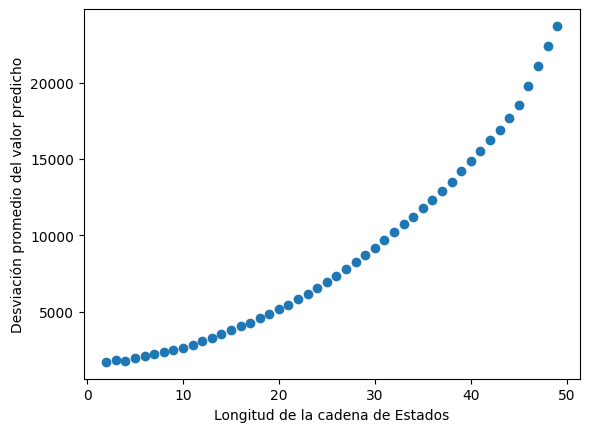

In [45]:
plt.scatter(x=x, y=y1)
plt.xlabel("Longitud de la cadena de Estados")
plt.ylabel("Desviación promedio del valor predicho")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

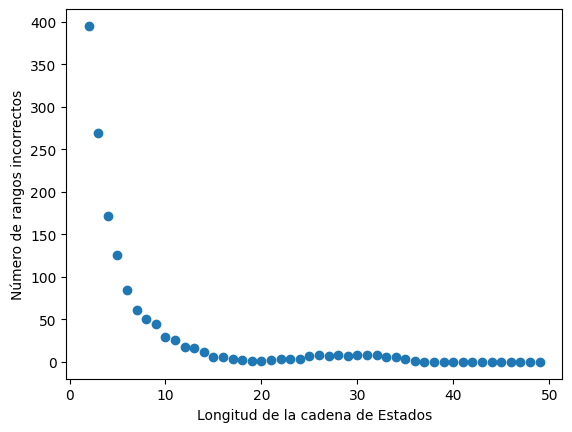

In [46]:
plt.scatter(x=x, y=y2)
plt.xlabel("Longitud de la cadena de Estados")
plt.ylabel("Número de rangos incorrectos")
plt.show